In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import io
import matplotlib.pyplot as plt

#### Tensorflow datasets

- ``tfds.load`` method downloads the dataset into your working directory
- ``with_info = True`` if you want to see the description of the dataset
- ``as_supervised`` is set to load the data as (input, label) pairs

# IMDB reviews plain text dataset

## Load dataset

In [2]:
imdb_plain, info_plain = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

print(info_plain)
print("########################")
for x in imdb_plain["train"].take(2):
    print(x)

2022-11-14 10:10:34.673213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        '

2022-11-14 10:10:35.009626: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [3]:
print(info_plain.splits)
print(info_plain.features)

{'train': <SplitInfo num_examples=25000, num_shards=1>, 'test': <SplitInfo num_examples=25000, num_shards=1>, 'unsupervised': <SplitInfo num_examples=50000, num_shards=1>}
FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})


In [4]:
text_plain_train = []
labels_plain_train = []
for sent,lab in imdb_plain["train"]: #sent,lab are tensors
    text_plain_train.append(sent.numpy().decode('utf8'))
    labels_plain_train.append(lab.numpy())
text_plain_train = np.array(text_plain_train)
labels_plain_train = np.array(labels_plain_train)

text_plain_test = []
labels_plain_test = []
for sent,lab in imdb_plain["test"]: #sent,lab are tensors
    text_plain_test.append(sent.numpy().decode('utf8'))
    labels_plain_test.append(lab.numpy())
text_plain_test = np.array(text_plain_test)
labels_plain_test = np.array(labels_plain_test)

print("Train => ",text_plain_train.shape,labels_plain_train.shape)
print("Test => ",text_plain_test.shape,labels_plain_test.shape)

Train =>  (25000,) (25000,)
Test =>  (25000,) (25000,)


## Text preprocessing

In [5]:
vec_layer_text_plain = tf.keras.layers.TextVectorization(max_tokens = 10000,
                                                       output_mode='int',
                                                       output_sequence_length=120)
vec_layer_text_plain.adapt(text_plain_train)
vectorized_text_plain_train = vec_layer_text_plain(text_plain_train)
vectorized_text_plain_test = vec_layer_text_plain(text_plain_test)
print("Vocab size = ",vec_layer_text_plain.vocabulary_size())
print(vectorized_text_plain_train[0])
print(vectorized_text_plain_test[1])

Vocab size =  10000
tf.Tensor(
[  11   14   34  412  384   18   90   28    1    8   33 1322 3560   42
  487    1  191   24   85  152   19   11  217  316   28   65  240  214
    8  489   54   65   85  112   96   22 5596   11   93  642  743   11
   18    7   34  394 9522  170 2464  408    2   88 1216  137   66  144
   51    2    1 7558   66  245   65 2870   16    1 2860    1    1 1426
 5050    3   40    1 1579   17 3560   14  158   19    4 1216  891 8040
    8    4   18   12   14 4059    5   99  146 1241   10  237  704   12
   48   24   93   39   11 7339  152   39 1322    1   50  398   10   96
 1155  851  141    9    0    0    0    0], shape=(120,), dtype=int64)
tf.Tensor(
[   4    1  723  784    5    4    1 2291    1 8569    2 8493   12 6125
    1   14  491    6 2733    8  107  491    6  360    4 1622    1 9379
   17    4 5002    5 8803   15   34    1   36   25 2693 1076    5   20
  245    9   14   34    1  679    6 6547   17  111  276    3  554 2925
    1    1  186 9468  106    5    1 

In [6]:
vocab = vec_layer_text_plain.get_vocabulary()
word = ''
for el in vectorized_text_plain_train[222]:
    pos = el.numpy()
    word += vocab[pos] + ' '
word.strip()   #remove leading and trailing whitespaces
print("Actual sentence => ",text_plain_train[222])
print("Decoded => ",word)

Actual sentence =>  This movie is horrible. THe acting is a waste basket. No crying, no action, hopeless songs. Though the scenery is great. I have always wanted to go to Greece.<br /><br />Anyway, as for Saif, you'd expect a great performance, but even he let down the people.<br /><br />Akshay Kumar, recognized as the pimp of Bollywood and the voice of Singhs. He was sensational in this movie. For only this performance, Filmfare should introduce another award. The toiletries award for the worst performance. By the way the trophy should be a toilet seat.<br /><br />Kareena Kapoor. She first of all is not comparable to her sister Karisma. In acting, in looks, or in body. She now wants to prove to herself that she surpasses her. She comes into this movie wearing bikini's and tank tops and short shorts. I really wonder why Saif Ali Khan is letting his wife-to-be dress like that. But, she must've impressed some people dressing like that. And if you ask how, then consider every man is havin

## Model (Deep Neural Network) : Build, compile and train

- Word Embedding = Vector (say 16-dimensional) that represents a word & its associated sentiment
- tf.keras.layers.GlobalAveragePooling1D() : Average across the vector to flatten it out

In [7]:
imdb_plain_flatten_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000,output_dim=16,input_length=120),

    tf.keras.layers.Flatten(), #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

imdb_plain_flatten_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

imdb_plain_flatten_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [8]:
imdb_plain_flatten_model.fit(x=vectorized_text_plain_train, y=labels_plain_train,
               epochs=20,
               validation_data=(vectorized_text_plain_test,labels_plain_test))

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 0.5046 - accuracy: 0.7335 - val_loss: 0.3862 - val_accuracy: 0.8257
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2394 - accuracy: 0.9067 - val_loss: 0.4100 - val_accuracy: 0.8202
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0908 - accuracy: 0.9759 - val_loss: 0.5159 - val_accuracy: 0.8059
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0228 - accuracy: 0.9972 - val_loss: 0.6023 - val_accuracy: 0.8064
Epoch 5/20
782/782 [==============================] - 3s 3ms/step - loss: 0.0073 - accuracy: 0.9994 - val_loss: 0.6805 - val_accuracy: 0.8038
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7403 - val_accuracy: 0.8064
Epoch 7/20
782/782 [==============================] - 3s 3ms/step - loss: 8.8307e-04 - accuracy: 1.0000 - val_loss: 0.7943 - val_accuracy: 0.8074
Ep

## Visualize Word Embeddings

- [Embedding projector](https://projector.tensorflow.org/) : Visualize the trained weights in the Embedding layer to see words that are clustered together

In [9]:
embedding_layer_plain = imdb_plain_flatten_model.layers[0]
embeddings_plain = embedding_layer_plain.get_weights()[0] #Weights as single list of NumPy arrays of (input_dim rows,output_dim cols)
vocabulary_plain = vec_layer_text_plain.get_vocabulary()

In [10]:
out_v = io.open('Models/C3W2_IMDBReviews/imdb_plain_vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('Models/C3W2_IMDBReviews/imdb_plain_metadata.tsv', 'w', encoding='utf-8')

for i in range(2,len(vocabulary_plain)):
  if i <= 1 :
    continue  # skip 0, it's padding. skip 1, its OOV
  vec = embeddings_plain[i]
  word = vocabulary_plain[i]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")

out_v.close()
out_m.close()

# IMDB reviews tokenized dataset

- This pre-tokenized dataset uses subword text encoding. This is an alternative to word-based tokenization
- For subwords8k, the dataset is already tokenized so the data type will be integers. Notice that the text features also include an encoder field and has a vocab_size of around 8k, hence the name

## Load dataset

In [11]:
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

print(info_subwords)
print("############ Encoded ############")
for x in imdb_subwords["train"].take(2):
    print(x)
print("############ Decoded ############")
encoder_im = info_subwords.features["text"].encoder
for x in imdb_subwords["train"].take(2):
    print(encoder_im.decode(x[0]))
    print("========")
print("###################################")
print("Vocab Size of Subword Text Encoding = ",encoder_im.vocab_size)

2022-11-14 10:11:55.465513: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    disab

2022-11-14 10:11:55.591423: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [12]:
print(info_subwords.splits)
print(info_subwords.features)

{'train': <SplitInfo num_examples=25000, num_shards=1>, 'test': <SplitInfo num_examples=25000, num_shards=1>, 'unsupervised': <SplitInfo num_examples=50000, num_shards=1>}
FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})


In [13]:
vocab = vec_layer_text_plain.get_vocabulary()
word = ''
for el in vectorized_text_plain_train[0]:
    pos = el.numpy()
    word += vocab[pos] + ' '
word.strip()   #remove leading and trailing whitespaces
print("Actual sentence => ",text_plain_train[0])
print("Decoded => ",word)

print("########################")
encoder_im = info_subwords.features["text"].encoder
for x in imdb_subwords["train"].take(1):
    print(encoder_im.decode(x[0]))

Actual sentence =>  This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Decoded =>  this was an absolutely terrible movie dont be [UNK] in by christopher walken or michael [UNK] both are great actors but this must simply be their worst role in history even their great acting could not redeem this movies ridiculous storyline this movie is an

2022-11-14 10:11:55.732065: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [14]:
imdb_subwords_train_ds = imdb_subwords["train"]
imdb_subwords_train_ds = imdb_subwords_train_ds.shuffle(buffer_size=25000)
imdb_subwords_train_ds = imdb_subwords_train_ds.padded_batch(batch_size=256) #Bigger batch (256) for LSTM. ELse 64

imdb_subwords_test_ds = imdb_subwords["test"]
imdb_subwords_test_ds = imdb_subwords_test_ds.padded_batch(batch_size=256) #Bigger batch (256) for LSTM. ELse 64

## Model (Deep Neural Network) : Build, compile and train

In [15]:
imdb_subwords_pool_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=encoder_im.vocab_size,output_dim=64),

    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

imdb_subwords_pool_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

imdb_subwords_pool_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [16]:
imdb_subwords_pool_model_hist = imdb_subwords_pool_model.fit(imdb_subwords_train_ds,
               epochs=10,
               validation_data=imdb_subwords_test_ds)

Epoch 1/10
98/98 [==============================] - 14s 133ms/step - loss: 0.6919 - accuracy: 0.5418 - val_loss: 0.6901 - val_accuracy: 0.5364
Epoch 2/10
98/98 [==============================] - 13s 127ms/step - loss: 0.6849 - accuracy: 0.6376 - val_loss: 0.6774 - val_accuracy: 0.6770
Epoch 3/10
98/98 [==============================] - 13s 133ms/step - loss: 0.6577 - accuracy: 0.7105 - val_loss: 0.6335 - val_accuracy: 0.7409
Epoch 4/10
98/98 [==============================] - 13s 128ms/step - loss: 0.5900 - accuracy: 0.7678 - val_loss: 0.5592 - val_accuracy: 0.7842
Epoch 5/10
98/98 [==============================] - 12s 121ms/step - loss: 0.5116 - accuracy: 0.8100 - val_loss: 0.4913 - val_accuracy: 0.8165
Epoch 6/10
98/98 [==============================] - 13s 128ms/step - loss: 0.4425 - accuracy: 0.8444 - val_loss: 0.4394 - val_accuracy: 0.8356
Epoch 7/10
98/98 [==============================] - 13s 129ms/step - loss: 0.3904 - accuracy: 0.8662 - val_loss: 0.4110 - val_accuracy: 0.8308

## Visualize Results

In [17]:
def plot_graphs(model_hist, string):
  plt.plot(model_hist.history[string])
  plt.plot(model_hist.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

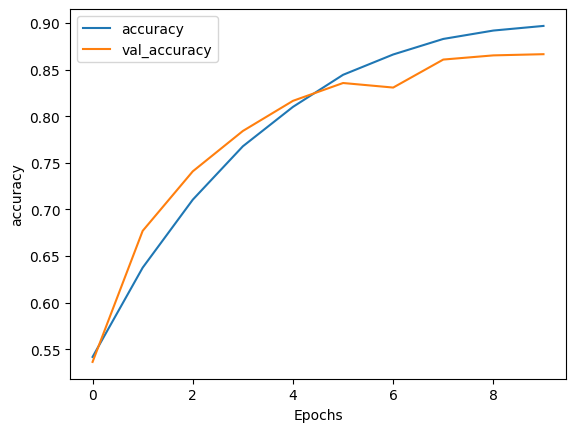

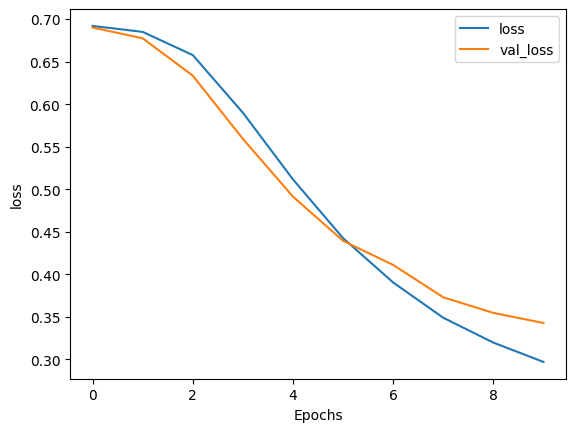

In [18]:
plot_graphs(imdb_subwords_pool_model_hist, "accuracy")
plot_graphs(imdb_subwords_pool_model_hist, "loss")